In [ ]:
 from google.colab import drive
 drive.mount('/content/gdrive')
 %cd'gdrive/My Drive/Colab Notebooks/Thesis/Vietnam_Decision_Tree'
 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/Thesis/Vietnam_Decision_Tree


In [ ]:
import pandas as pd
data=pd.read_csv('baseline.csv')
data.head()
test=data.copy()

In [ ]:

test.info()
test=test.replace('NA','')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   st_no           2301 non-null   object 
 1   age             2300 non-null   float64
 2   sex             2301 non-null   object 
 3   wt              2296 non-null   float64
 4   day_ill         2301 non-null   int64  
 5   his_tired       2298 non-null   object 
 6   his_vomit       2295 non-null   object 
 7   ttest           2289 non-null   object 
 8   temp            2299 non-null   float64
 9   pulse           2297 non-null   float64
 10  sys_bp          2298 non-null   float64
 11  mucosal_bleed   2283 non-null   object 
 12  abdominal_pain  2291 non-null   object 
 13  liver           2279 non-null   float64
 14  hct_bsl         2259 non-null   float64
 15  plt_bsl         2258 non-null   float64
 16  serotype2       2152 non-null   object 
 17  serology        2271 non-null   o

In [ ]:
test.head(60)

,st_no,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,serotype2,serology,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,1,13.0,Male,31.0,3,No,Yes,NaN,NaN,NaN,NaN,No,Yes,2.0,NaN,NaN,DENV-2,NaN,Yes,Yes,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,12.0,Female,37.0,2,Yes,Yes,Negative,38.0,100.0,100.0,No,No,0.0,38.0,184000.0,DENV-4,Possible primary,No,No,NaN,No,NaN,NaN,NaN,NaN,NaN
2,1002,11.0,Male,27.0,4,Yes,No,Positive,38.5,90.0,80.0,No,No,0.0,40.8,220000.0,DENV-1,Unclassifiable,No,No,NaN,No,140000.0,6.0,40.8,4.0,2.000000
3,1003,13.0,Male,20.0,3,Yes,No,Negative,38.0,100.0,90.0,No,No,0.0,39.3,91000.0,DENV-2,Secondary dengue,No,No,NaN,No,41400.0,4.0,45.7,4.0,12.839506
4,1004,11.0,Male,27.0,3,Yes,Yes,Negative,40.5,100.0,90.0,No,No,0.0,34.0,92000.0,DENV-2,Secondary dengue,No,No,NaN,Mucose,30000.0,6.0,45.9,6.0,14.750000
5,1005,14.0,Male,60.0,4,Yes,No,Positive,38.5,90.0,110.0,No,No,0.0,43.0,144000.0,Negative,Secondary dengue,No,No,NaN,No,142000.0,5.0,43.0,4.0,7.500000
6,1006,11.0,Female,42.0,3,No,Yes,Negative,38.3,100.0,100.0,No,No,0.0,40.6,82300.0,DENV-2,Secondary dengue,No,No,NaN,No,40000.0,6.0,40.6,3.0,24.159021
7,1007,8.0,Female,29.0,3,No,Yes,Negative,38.0,100.0,100.0,No,No,0.0,36.6,118000.0,DENV-4,Secondary dengue,No,No,NaN,No,78000.0,5.0,40.5,5.0,12.500000
8,1008,9.0,Male,20.0,3,Yes,No,Negative,38.5,100.0,100.0,Yes,No,0.0,37.9,72100.0,Negative,Secondary dengue,No,No,NaN,No,72000.0,6.0,43.4,6.0,15.425532
9,1009,6.0,Male,32.0,2,No,Yes,Negative,38.5,100.0,100.0,No,No,0.0,34.7,218000.0,DENV-2,Possible primary,Yes,Yes,5.0,Skin,28000.0,5.0,48.0,6.0,29.729730


https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


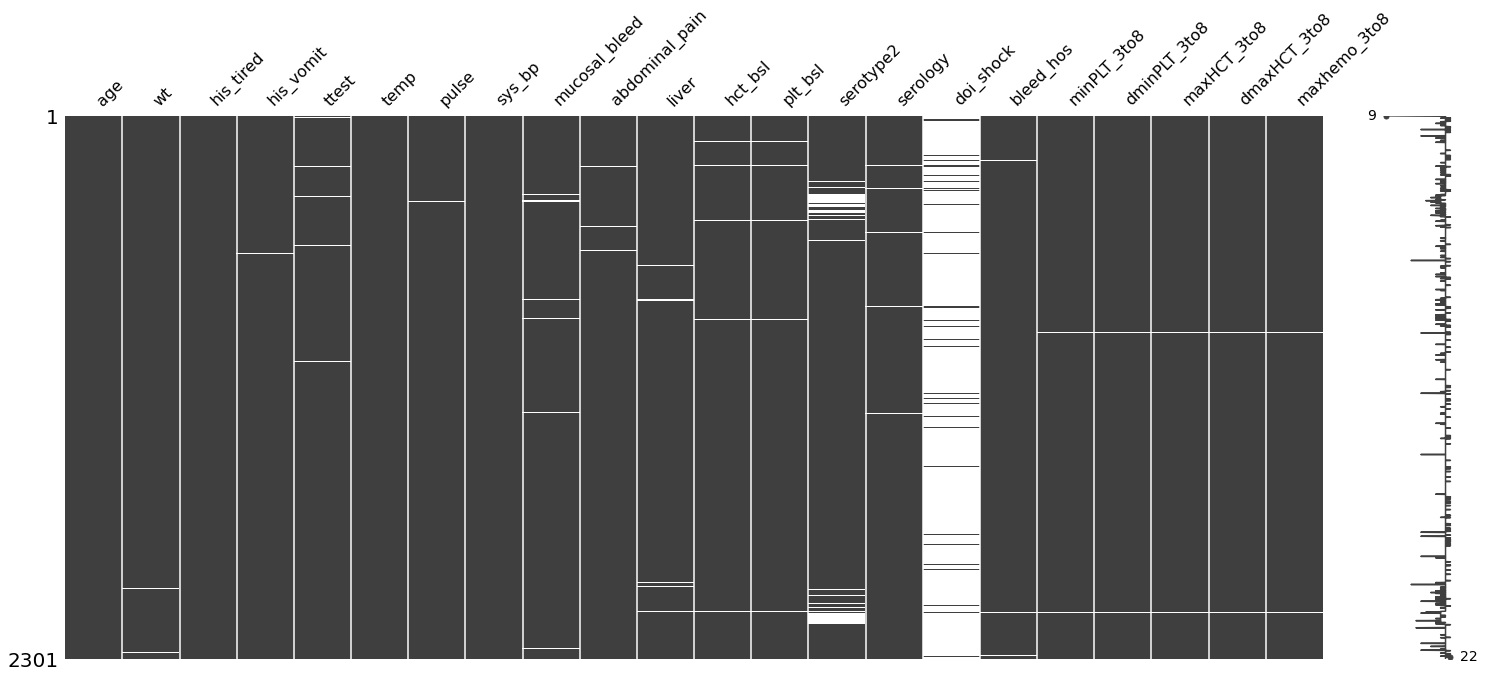

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import missingno as msno
%matplotlib inline

missingdata_df =test.columns[test.isnull().any()].tolist()
msno.matrix(test[missingdata_df])

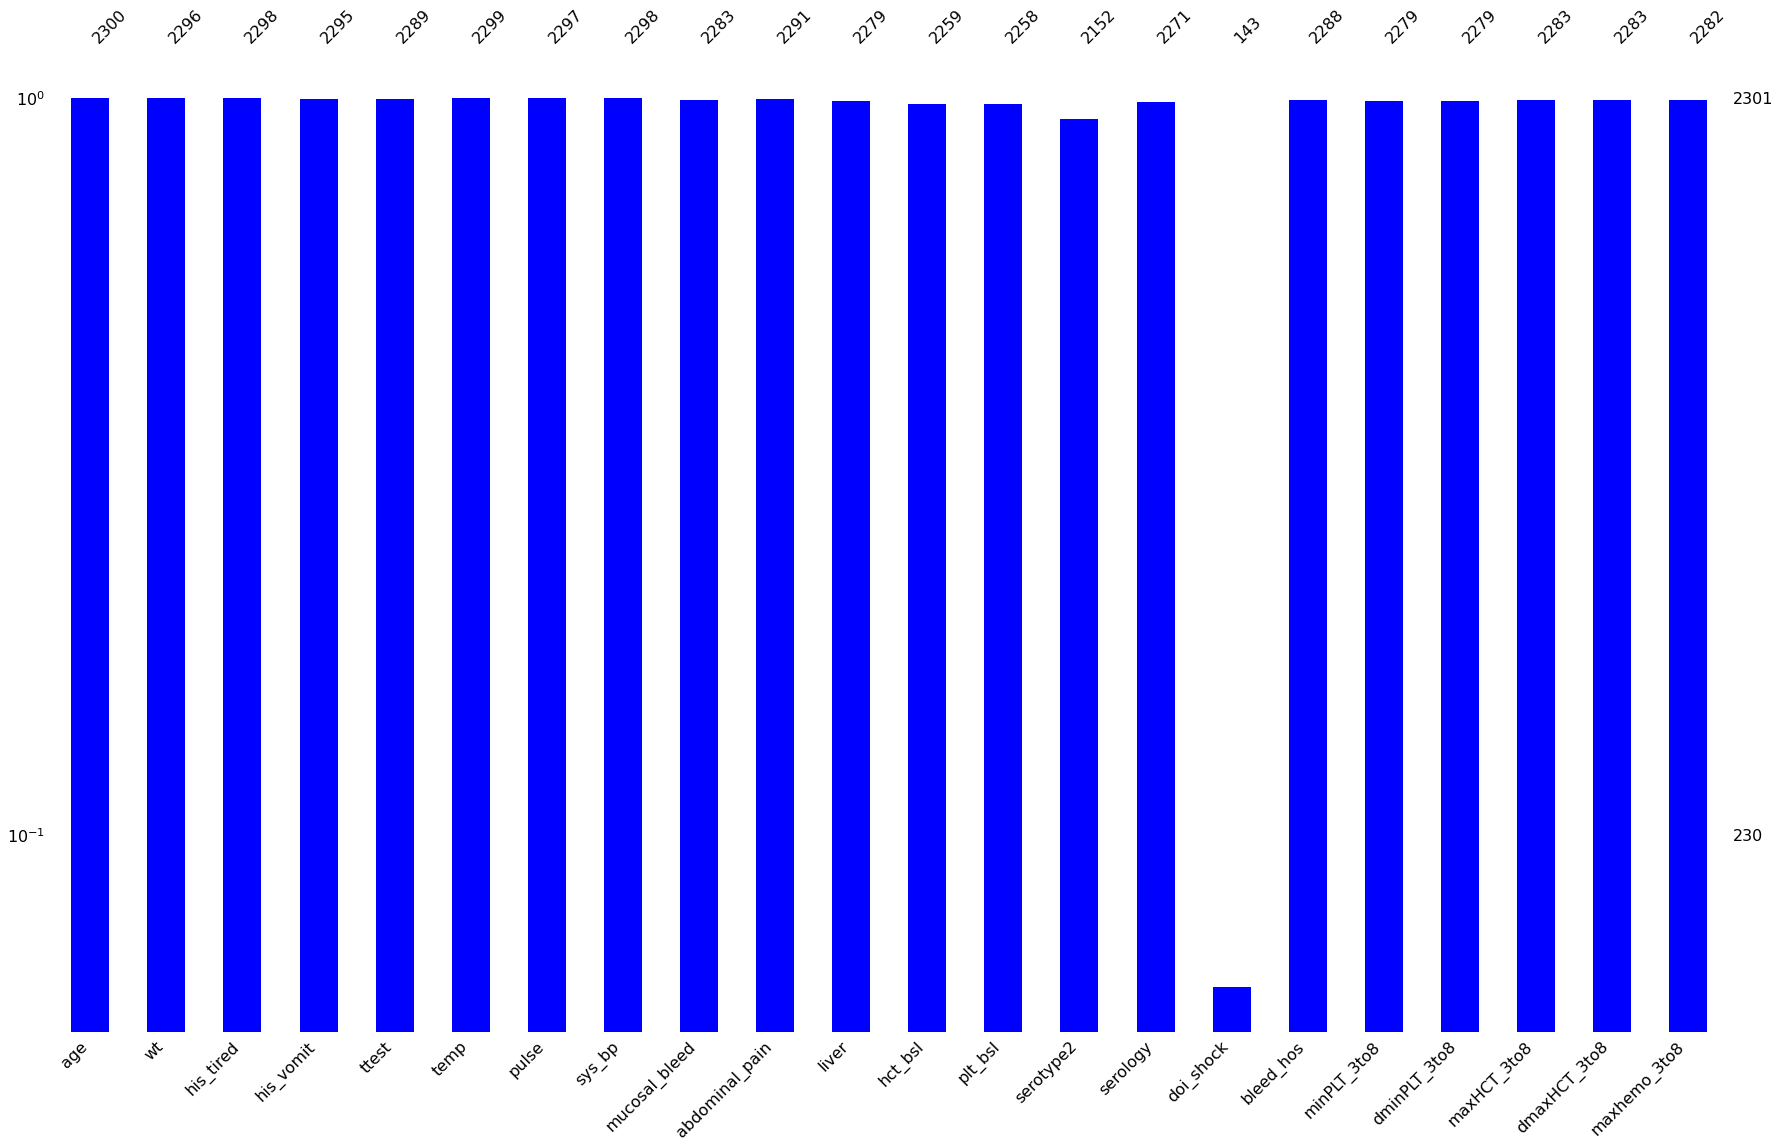

In [ ]:
msno.bar(test[missingdata_df], color="blue", log=True, figsize=(30,18))

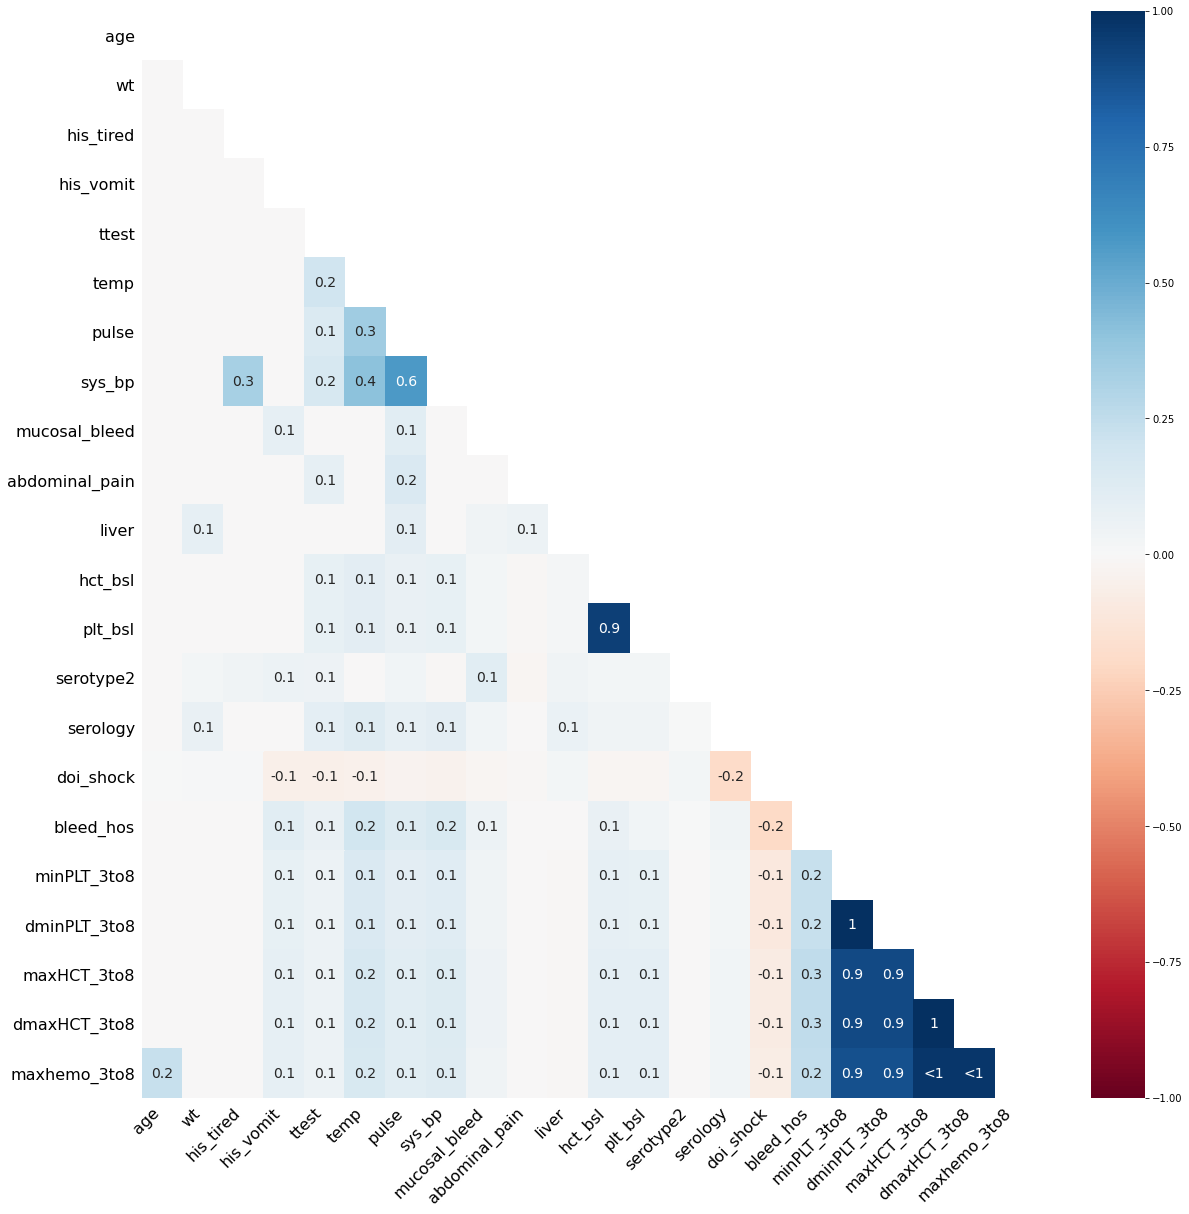

In [ ]:
msno.heatmap(test[missingdata_df], figsize=(20,20))

Dropping the numerical column

In [ ]:
test1=test.copy()
test1.head()
test1=test1.drop(['st_no','wt','temp','pulse','sys_bp','liver','hct_bsl','plt_bsl','serotype2','serology','doi_shock','minPLT_3to8','dminPLT_3to8','maxHCT_3to8','dmaxHCT_3to8','maxhemo_3to8'],axis=1)
test1.head()

,age,sex,day_ill,his_tired,his_vomit,ttest,mucosal_bleed,abdominal_pain,to_PICU,shock,bleed_hos
0,13.0,Male,3,No,Yes,NaN,No,Yes,Yes,Yes,NaN
1,12.0,Female,2,Yes,Yes,Negative,No,No,No,No,No
2,11.0,Male,4,Yes,No,Positive,No,No,No,No,No
3,13.0,Male,3,Yes,No,Negative,No,No,No,No,No
4,11.0,Male,3,Yes,Yes,Negative,No,No,No,No,Mucose


Categorical missing value replaced with mode

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values='NaN',strategy='median',verbose=0, copy=True)
# print(imp.fit_transform(test1),columns=test1.columns,index=test1.index)
cols=['his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','shock','bleed_hos']
test1[cols]=test1[cols].fillna(test1.mode().iloc[0])
test1.head(10)

,age,sex,day_ill,his_tired,his_vomit,ttest,mucosal_bleed,abdominal_pain,to_PICU,shock,bleed_hos
0,13.0,Male,3,No,Yes,Negative,No,Yes,Yes,Yes,No
1,12.0,Female,2,Yes,Yes,Negative,No,No,No,No,No
2,11.0,Male,4,Yes,No,Positive,No,No,No,No,No
3,13.0,Male,3,Yes,No,Negative,No,No,No,No,No
4,11.0,Male,3,Yes,Yes,Negative,No,No,No,No,Mucose
5,14.0,Male,4,Yes,No,Positive,No,No,No,No,No
6,11.0,Female,3,No,Yes,Negative,No,No,No,No,No
7,8.0,Female,3,No,Yes,Negative,No,No,No,No,No
8,9.0,Male,3,Yes,No,Negative,Yes,No,No,No,No
9,6.0,Male,2,No,Yes,Negative,No,No,Yes,Yes,Skin


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()
test1['sex']=le_sex.fit_transform(test1['sex'])#Male 1 female 0
le_his_tired=LabelEncoder()
test1['his_tired']=le_his_tired.fit_transform(test1['his_tired'])#yes 1 no 0
le_his_vomit=LabelEncoder()
test1['his_vomit']=le_his_vomit.fit_transform(test1['his_vomit'])#yes 1 no 0
le_ttest=LabelEncoder()
test1['ttest']=le_ttest.fit_transform(test1['ttest'])#negative 1 positive 2 equivocal 0
le_mucosal_bleed=LabelEncoder()
test1['mucosal_bleed']=le_mucosal_bleed.fit_transform(test1['mucosal_bleed'])#yes 0 no 1
le_abdominal_pain=LabelEncoder()
test1['abdominal_pain']=le_abdominal_pain.fit_transform(test1['abdominal_pain'])#yes 0 no 1
le_to_PICU=LabelEncoder()
test1['to_PICU']=le_to_PICU.fit_transform(test1['to_PICU'])#yes 0 no 1
le_shock=LabelEncoder()
test1['shock']=le_shock.fit_transform(test1['shock'])#yes 1 no 0
le_bleed_hos=LabelEncoder()
test1['bleed_hos']=le_bleed_hos.fit_transform(test1['bleed_hos'])#1 no 3 skin 0 mucous
# le_to_PICU=LabelEncoder()
# test['to_PICU']=le_sex.fit_transform(test['to_PICU'])#No 0 and Yes 1


In [ ]:
test1=test1.interpolate()

In [ ]:
test1.head(100)

,age,sex,day_ill,his_tired,his_vomit,ttest,mucosal_bleed,abdominal_pain,to_PICU,shock,bleed_hos
0,13.0,1,3,0,1,1,0,1,1,1,1
1,12.0,0,2,1,1,1,0,0,0,0,1
2,11.0,1,4,1,0,2,0,0,0,0,1
3,13.0,1,3,1,0,1,0,0,0,0,1
4,11.0,1,3,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,12.0,1,4,1,1,2,0,0,0,0,1
96,11.0,0,3,1,1,1,0,1,0,0,1
97,10.0,0,3,1,1,1,0,1,0,0,1
98,13.0,1,3,0,0,0,0,1,0,0,1


In [ ]:
test1.to_csv('filteredBaseline.csv') 

Decision Tree Classifier

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
feature_cols =['age','sex','day_ill','his_tired','his_vomit','ttest','mucosal_bleed','abdominal_pain','to_PICU','bleed_hos']
#feature_cols1=['Sex', 'NAge','HCT']
X=test1[feature_cols]
y=test1.shock
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

ENTROPY

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy')
trained_model = clf_en.fit(X_train,y_train)
trained_model.fit(X_train, y_train)
y_pred = clf_en.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, trained_model.predict(X_train)))
print('Test Accuracy: ',accuracy_score(y_test, y_pred))

Train Accuracy:  0.9987577639751553
Test Accuracy:  0.975397973950796


In [ ]:
print('Confusion Matrix: '
,confusion_matrix(y_test, y_pred))

Confusion Matrix:  [[646  11]
 [  6  28]]


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


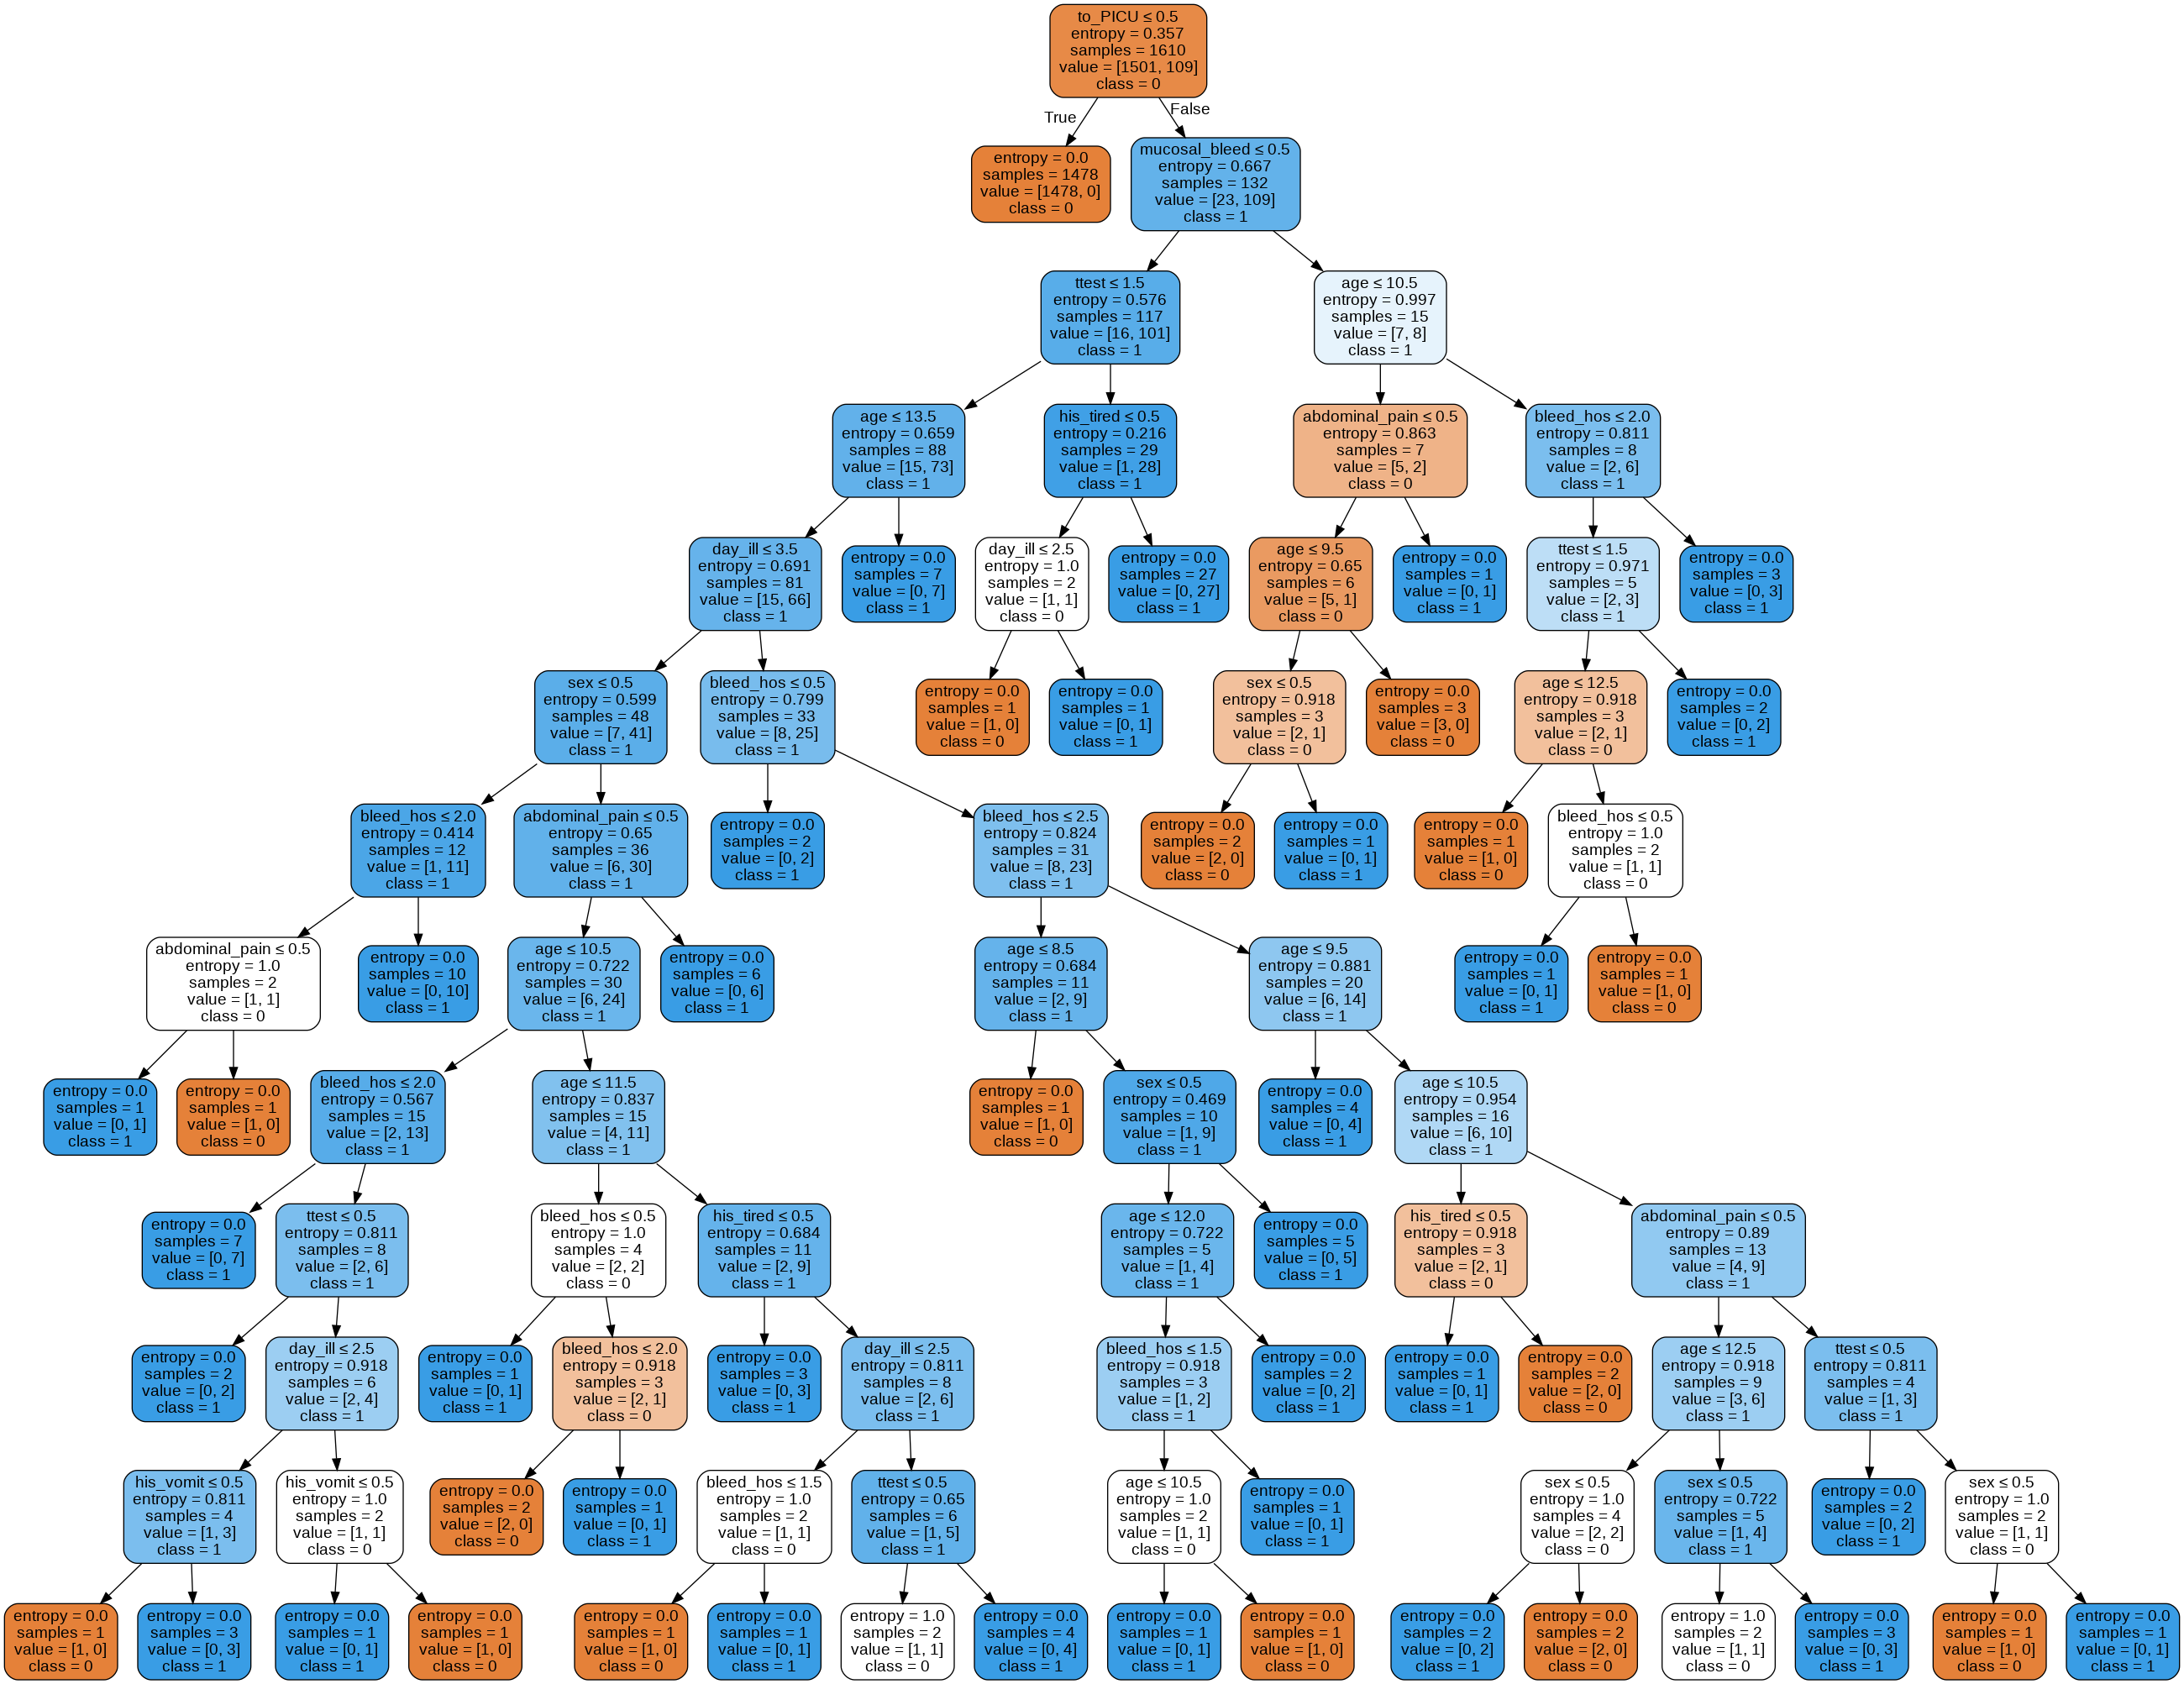

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_en, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dengue.png')
Image(graph.create_png())

Gini

In [ ]:
clf_gi = DecisionTreeClassifier(criterion='gini')
trained_model = clf_gi.fit(X_train,y_train)
trained_model.fit(X_train, y_train)
y_pred = clf_gi.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, trained_model.predict(X_train)))
print('Test Accuracy: ',accuracy_score(y_test, y_pred))

Train Accuracy:  0.9987577639751553
Test Accuracy:  0.9782923299565847


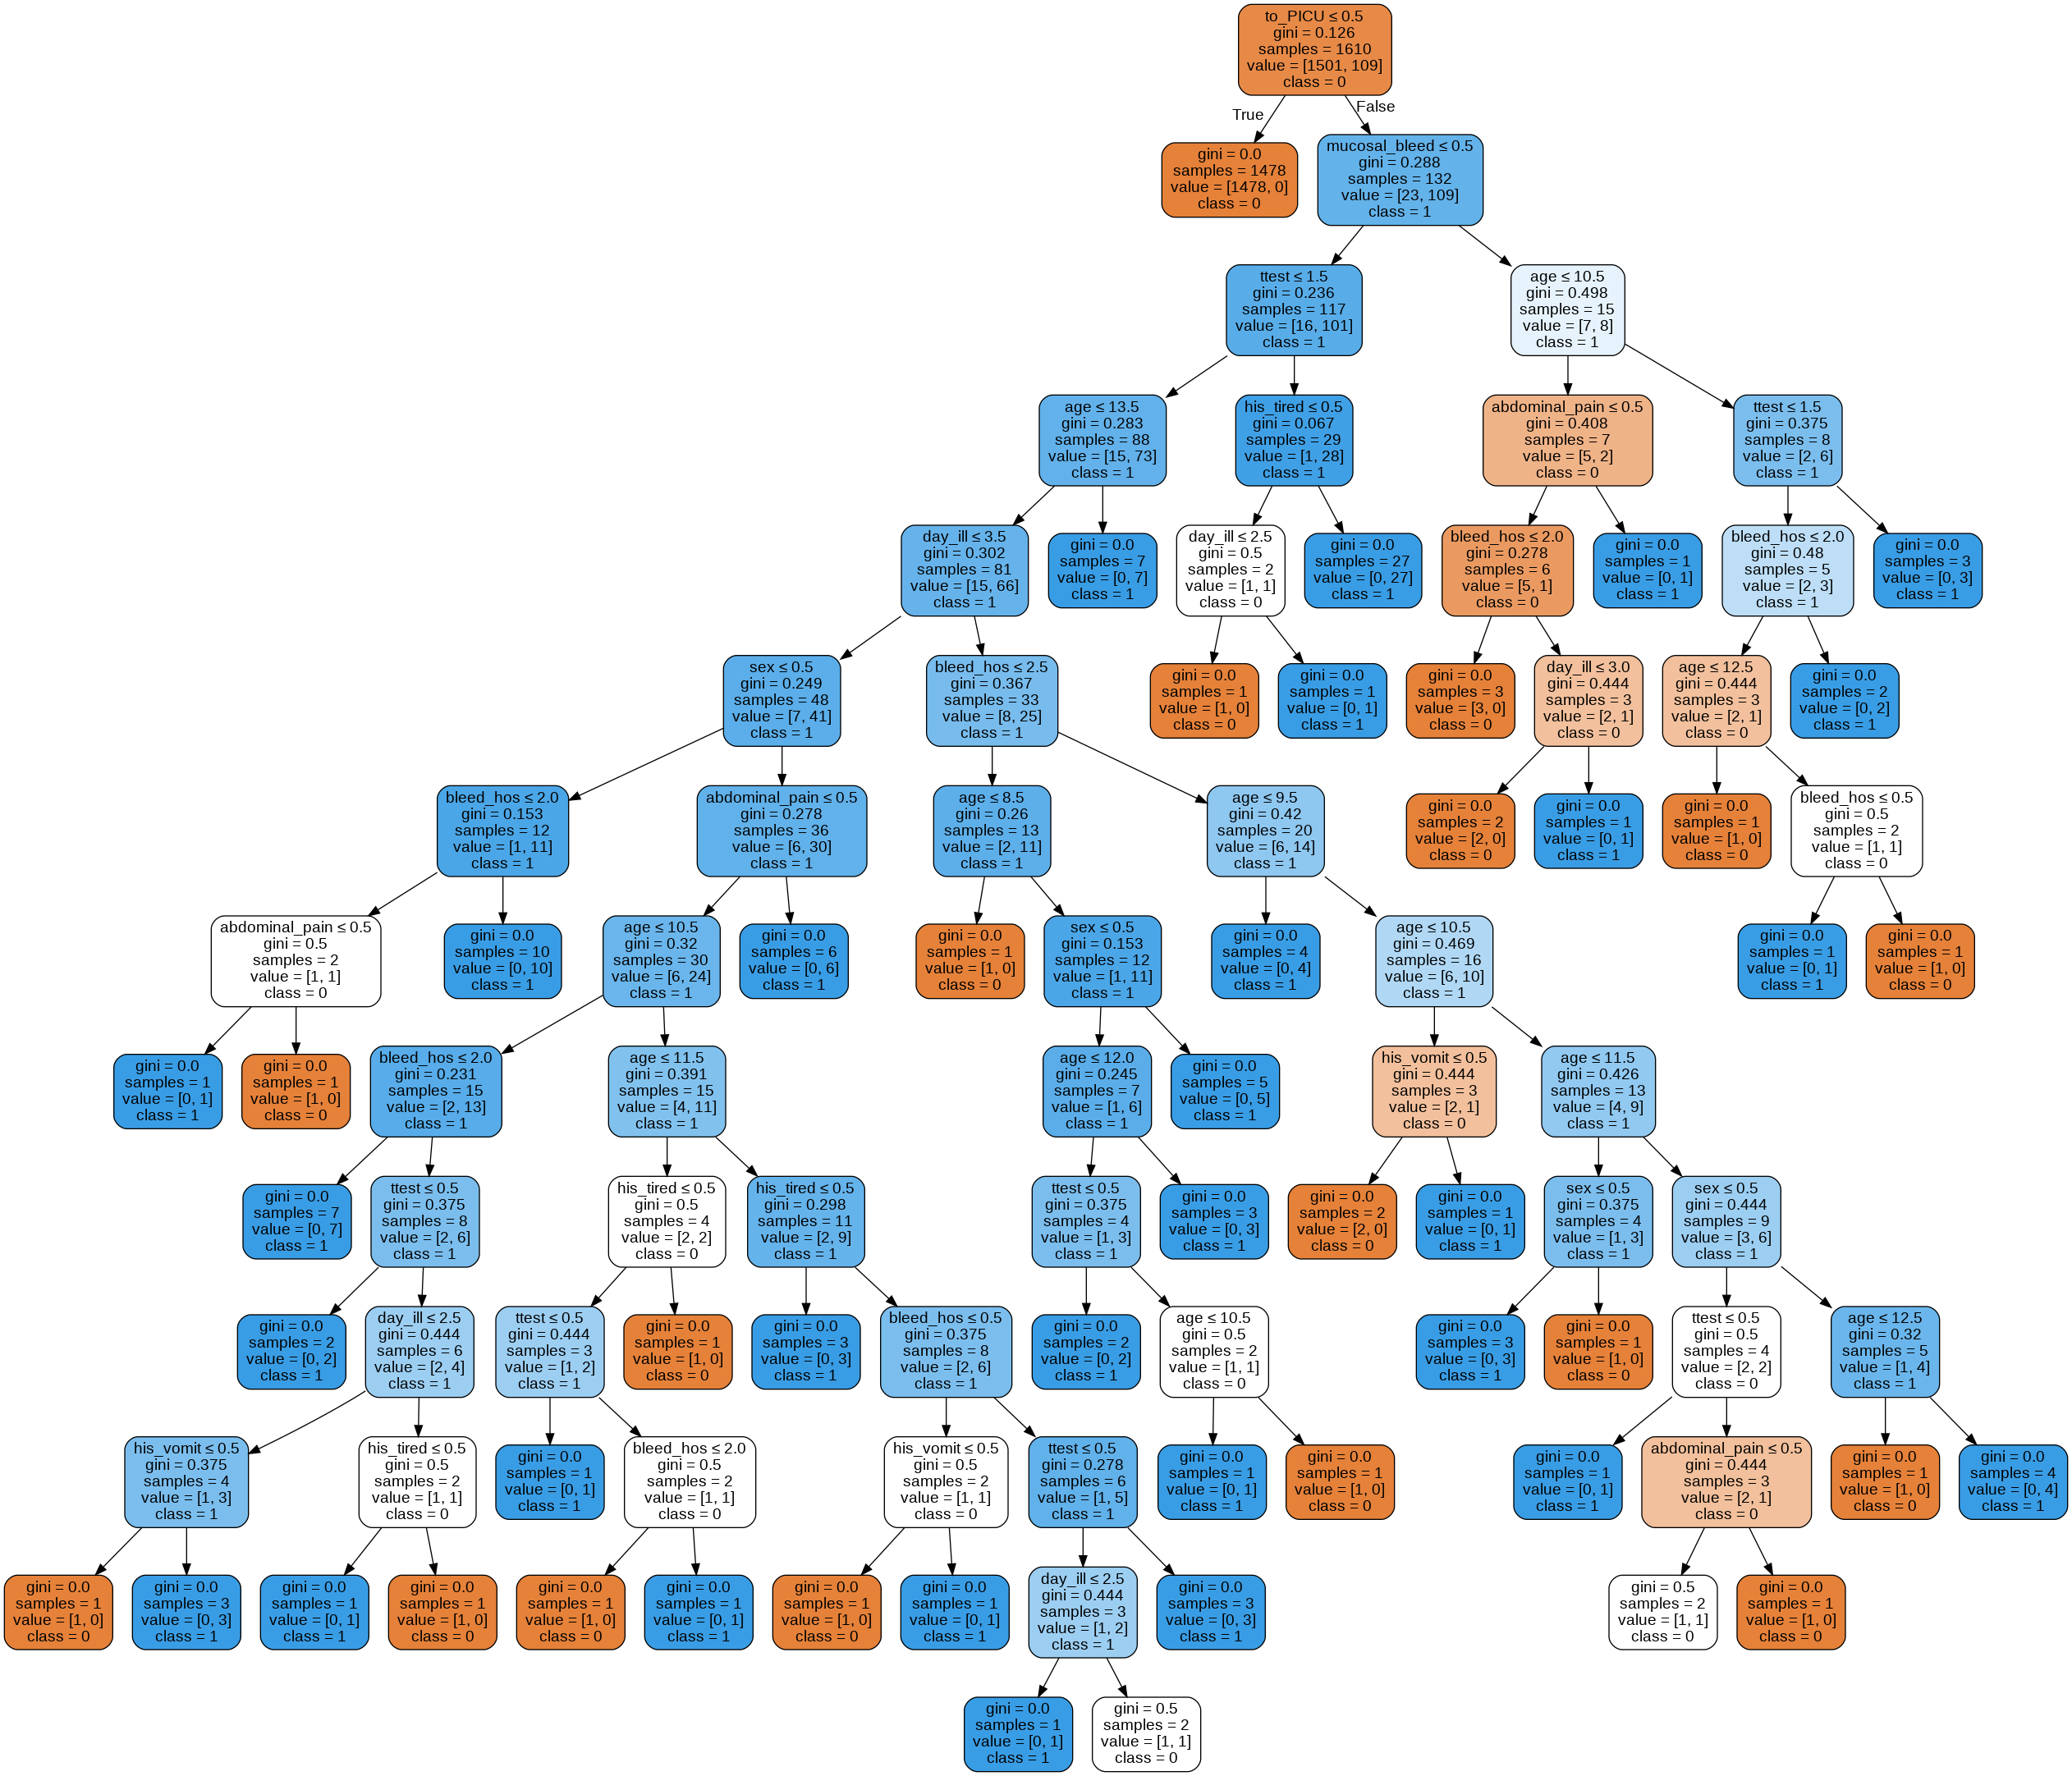

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gi, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dengue_g.png')
Image(graph.create_png())

Implemented different values for max_depth (from 1 to 30) and visualize its results to see how the accuracy differs for each value.

    accuracy_gini  accuracy_entropy  max_depth
0        0.981187          0.981187          1
1        0.981187          0.981187          2
2        0.979740          0.979740          3
3        0.981187          0.981187          4
4        0.979740          0.979740          5
5        0.981187          0.981187          6
6        0.981187          0.978292          7
7        0.975398          0.981187          8
8        0.975398          0.975398          9
9        0.982634          0.978292         10
10       0.976845          0.978292         11
11       0.978292          0.979740         12
12       0.978292          0.976845         13
13       0.976845          0.979740         14
14       0.973951          0.972504         15
15       0.973951          0.975398         16
16       0.981187          0.973951         17
17       0.978292          0.976845         18
18       0.975398          0.973951         19
19       0.976845          0.975398         20
20       0.97

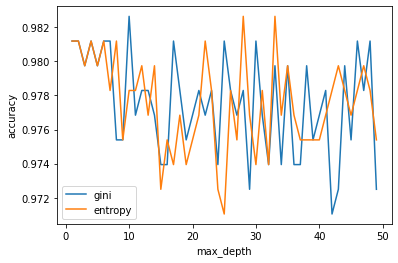

In [ ]:
max_depth = []
accuracy_gini = []
accuracy_entropy = []
for i in range(1,50):
 dtree = DecisionTreeClassifier(criterion='gini',max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 accuracy_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
 d = pd.DataFrame({'accuracy_gini':pd.Series(accuracy_gini), 
 'accuracy_entropy':pd.Series(accuracy_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','accuracy_gini', data=d, label='gini')
plt.plot('max_depth','accuracy_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

print(d)

More Accuracy

In [ ]:
clf_gi_6 = DecisionTreeClassifier(criterion='gini',max_depth=6)
trained_model = clf_gi_6.fit(X_train,y_train)
trained_model.fit(X_train, y_train)
y_pred = clf_gi_6.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, trained_model.predict(X_train)))
print('Test Accuracy: ',accuracy_score(y_test, y_pred))

Train Accuracy:  0.9900621118012423
Test Accuracy:  0.9811866859623734


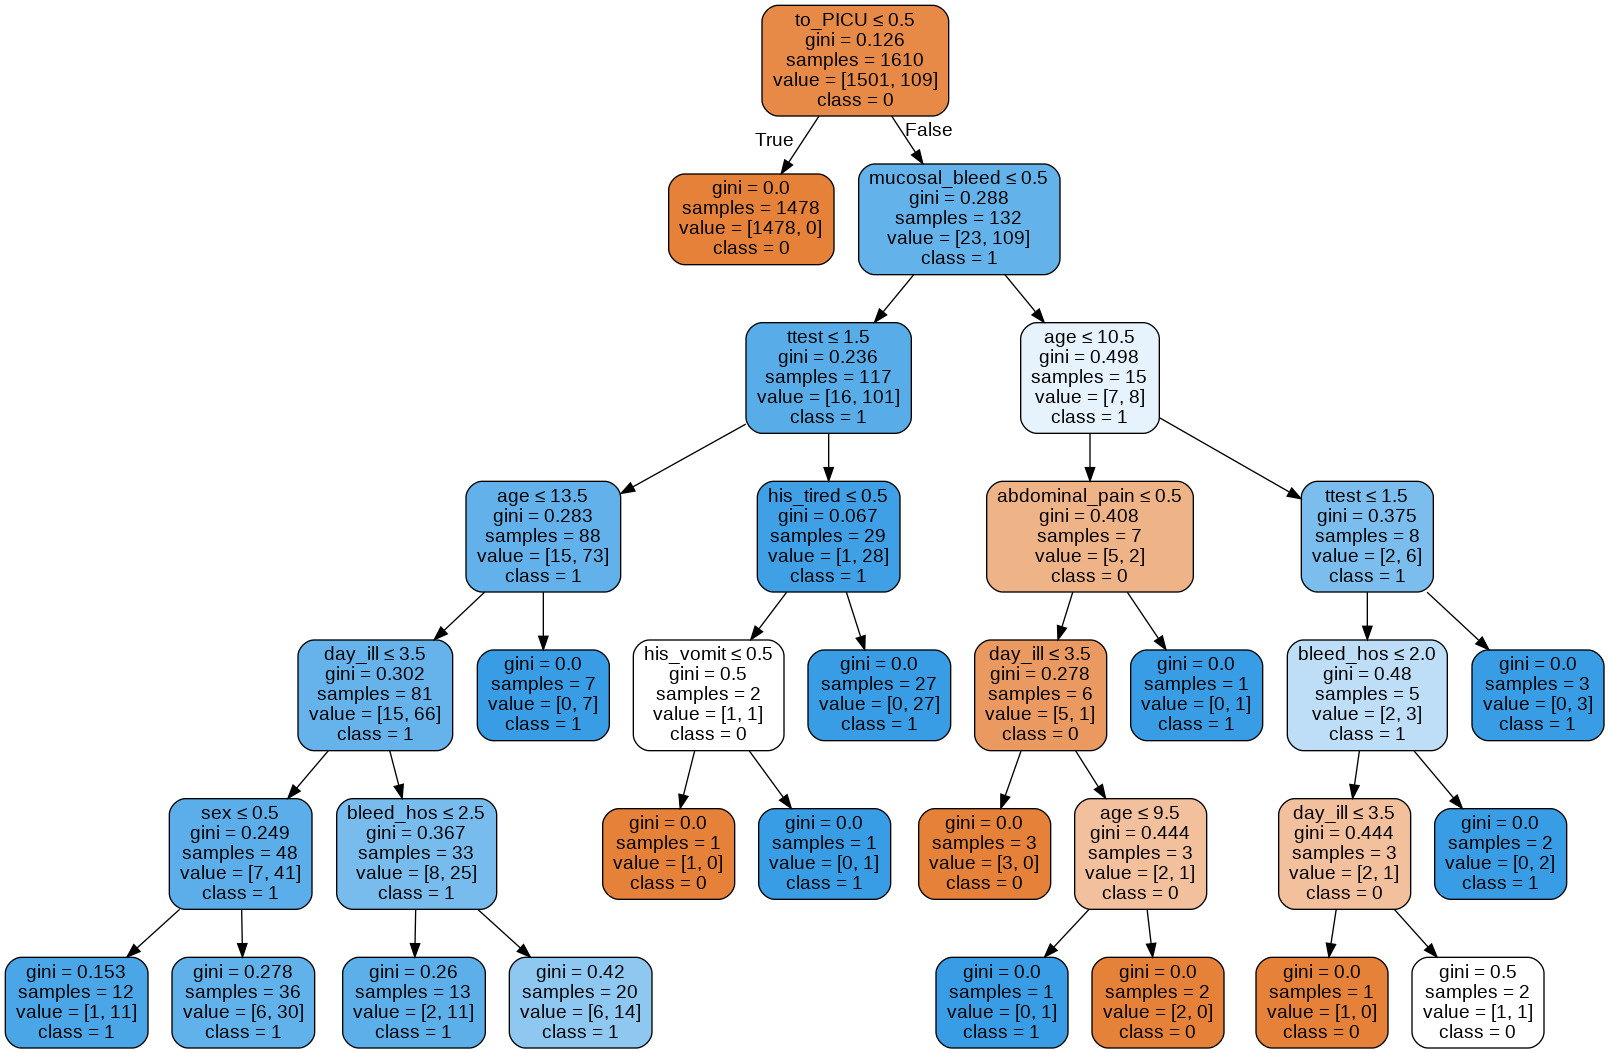

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gi_6, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dengue_g_6.png')
Image(graph.create_png())

Hyper Parametre Tuning

In [ ]:
#Hyperparametre Tuning

from scipy.stats import randint
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
#Initializing Decision Treee Classifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
# #Instantiate RandomizedSearchCV object

# tree_cv=RandomizedSearchCV(tree,param_dist,cv=5)#cv=cross validation grid

In [ ]:
# #Fitting classifier to the training set

# tree_cv.fit(X_train,y_train)


In [ ]:
# #Printing the tuned parametres and score

# print("Tuned Decision tree parametres: {}".format(tree_cv.best_params_))
# print("Best Score is: {}".format(tree_cv.best_score_))

In [ ]:
# y_pred_2=tree_cv.predict(X_test)

In [ ]:
# #Mking the Cinfusion Matrix

# from sklearn.metrics import confusion_matrix
# cm=confusion_matrix(y_test,y_pred_2)
# print(cm)


MICE Algorithm


In [ ]:
test2=test.copy()
test2=test2.drop(['serotype2','serology','st_no'],axis='columns')
test2.head()

,age,sex,wt,day_ill,his_tired,his_vomit,ttest,temp,pulse,sys_bp,mucosal_bleed,abdominal_pain,liver,hct_bsl,plt_bsl,to_PICU,shock,doi_shock,bleed_hos,minPLT_3to8,dminPLT_3to8,maxHCT_3to8,dmaxHCT_3to8,maxhemo_3to8
0,13.0,Male,31.0,3,No,Yes,NaN,NaN,NaN,NaN,No,Yes,2.0,NaN,NaN,Yes,Yes,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1,12.0,Female,37.0,2,Yes,Yes,Negative,38.0,100.0,100.0,No,No,0.0,38.0,184000.0,No,No,NaN,No,NaN,NaN,NaN,NaN,NaN
2,11.0,Male,27.0,4,Yes,No,Positive,38.5,90.0,80.0,No,No,0.0,40.8,220000.0,No,No,NaN,No,140000.0,6.0,40.8,4.0,2.000000
3,13.0,Male,20.0,3,Yes,No,Negative,38.0,100.0,90.0,No,No,0.0,39.3,91000.0,No,No,NaN,No,41400.0,4.0,45.7,4.0,12.839506
4,11.0,Male,27.0,3,Yes,Yes,Negative,40.5,100.0,90.0,No,No,0.0,34.0,92000.0,No,No,NaN,Mucose,30000.0,6.0,45.9,6.0,14.750000


In [ ]:
test2['abdominal_pain'].notnull()=LabelEncoder()


0       True
1       True
2       True
3       True
4       True
        ... 
2296    True
2297    True
2298    True
2299    True
2300    True
Name: abdominal_pain, Length: 2301, dtype: bool

In [ ]:
from fancyimpute import IterativeImputer

mice_impute = IterativeImputer()
traindatafill = mice_impute.fit_transform(test2)

ValueError: ignored

In [ ]:
print(traindatafill)

[[13.  1.  3. ...  1.  1.  1.]
 [12.  0.  2. ...  0.  0.  1.]
 [11.  1.  4. ...  0.  0.  1.]
 ...
 [ 9.  0.  2. ...  0.  0.  1.]
 [10.  0.  4. ...  0.  0.  1.]
 [15.  0.  4. ...  0.  0.  1.]]
